In [1]:
!pip install kaggle

In [2]:
!mkdir /root/.kaggle/  

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [3]:
!cp /content/drive/MyDrive/Key/kaggle.json /root/.kaggle/  

In [4]:
!kaggle datasets download -d hchen13/marvel-heroes

 98% 1.11G/1.13G [00:17<00:00, 91.4MB/s]
100% 1.13G/1.13G [00:17<00:00, 70.6MB/s]


In [5]:
!unzip -d /content/Avengers_Assemble/ /content/marvel-heroes.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_093.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_094.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_096.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_097.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_098.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_099.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_100.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_101.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_102.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_105.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_106.jpg  
  inflating: /content/Avengers_Assemble/marvel/marvel/train/hulk/pic_107.jpg  
 

# Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [7]:
from keras.models import Input,Model
from keras.layers import Dense,Activation,Dropout,Flatten,MaxPool2D,Conv2D
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions

# Preprocessing Training set

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=20,
                                 height_shift_range=0.1,width_shift_range=0.1,
                                 shear_range=0.2,zoom_range=0.2)

training_set=train_datagen.flow_from_directory('/content/Avengers_Assemble/marvel/train',target_size=(256,256),class_mode='categorical',
                                               batch_size=32,shuffle=True)

Found 2584 images belonging to 8 classes.


# Preprocessing Test set


In [9]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_set=test_datagen.flow_from_directory('/content/Avengers_Assemble/marvel/valid',
                                          target_size=(256,256),class_mode='categorical',
                                          batch_size=32,shuffle=True)

Found 451 images belonging to 8 classes.


# Dataset Inspection

In [10]:
from keras.preprocessing import image
import matplotlib.image as img

**And I am IRON MAN**

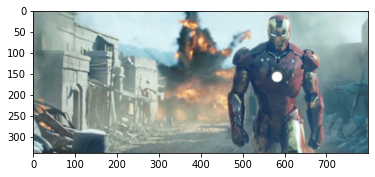

In [11]:
path1='/content/Avengers_Assemble/marvel/train/ironman/pic_390.jpg'
plt.imshow(img.imread(path1))

**Hulk Smash**

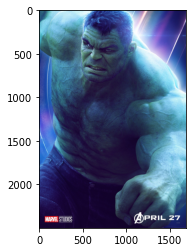

In [12]:
path2='/content/Avengers_Assemble/marvel/train/hulk/pic_002.jpg'
plt.imshow(img.imread(path2))

**I can do this all day**

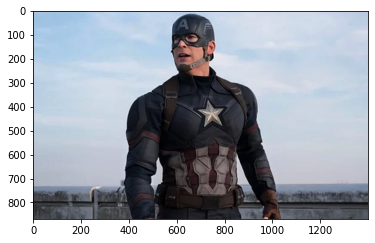

In [13]:
path3='/content/Avengers_Assemble/marvel/train/captain america/pic_004.jpg'
plt.imshow(img.imread(path3))

**Dormammu, I've Come To Bargain**

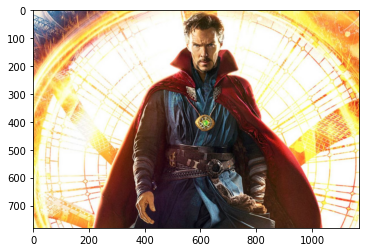

In [14]:
path4='/content/Avengers_Assemble/marvel/train/doctor strange/pic_008.jpg'
plt.imshow(img.imread(path4))

**YOU COULD NOT LIVE WITH YOUR OWN FAILURE, AND WHERE DID THAT BRING YOU?**

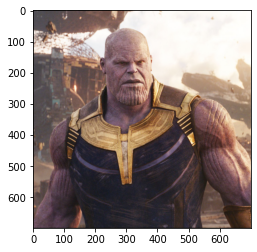

In [15]:
path5='/content/Avengers_Assemble/marvel/train/thanos/pic_005.jpg'
plt.imshow(img.imread(path5))

# Making CNN Architecture

In [16]:
ptm=InceptionV3(input_shape=(256,256,3),weights='imagenet',include_top=False)
for layer in ptm.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [17]:
flat=Flatten()(ptm.output)
out=Dense(units=8,activation='softmax')(flat)
model=Model(inputs=ptm.input,outputs=out)

In [18]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint('InceptionV3_model.h5', verbose=1, save_best_only=True)

# Compiling the Model

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Flow-Chart

In [21]:
tf.keras.utils.plot_model(model=model,to_file='inception_archi.png',show_shapes=True)

# Training Model

In [22]:
model.fit(x=training_set,validation_data=test_set,epochs=40,callbacks=checkpoint)

Epoch 1/40
81/81 [==============================] - 108s 886ms/step - loss: 18.2007 - accuracy: 0.2203 - val_loss: 5.4409 - val_accuracy: 0.4479

Epoch 00001: val_loss improved from inf to 5.44086, saving model to InceptionV3_model.h5
Epoch 2/40
81/81 [==============================] - 70s 862ms/step - loss: 4.3449 - accuracy: 0.5113 - val_loss: 8.2605 - val_accuracy: 0.3947

Epoch 00002: val_loss did not improve from 5.44086
Epoch 3/40
81/81 [==============================] - 70s 860ms/step - loss: 4.7873 - accuracy: 0.5267 - val_loss: 6.6551 - val_accuracy: 0.4590

Epoch 00003: val_loss did not improve from 5.44086
Epoch 4/40
81/81 [==============================] - 70s 863ms/step - loss: 4.0899 - accuracy: 0.5767 - val_loss: 9.3114 - val_accuracy: 0.4457

Epoch 00004: val_loss did not improve from 5.44086
Epoch 5/40
81/81 [==============================] - 69s 859ms/step - loss: 4.5371 - accuracy: 0.5819 - val_loss: 6.8392 - val_accuracy: 0.5033

Epoch 00005: val_loss did not improv

In [23]:

from keras.models import load_model
model.save("avengers_network.h5")

In [42]:
model_saved=load_model('/content/avengers_network.h5')

In [24]:
metrics=pd.DataFrame(model.history.history)

In [25]:
metrics

loss  accuracy   val_loss  val_accuracy
0   10.823752  0.321981   5.440857      0.447894
1    4.651555  0.498839   8.260537      0.394679
2    4.818918  0.540635   6.655076      0.458980
3    4.261023  0.587074   9.311380      0.445676
4    4.335922  0.588622   6.839227      0.503326
5    4.638041  0.592105   7.722857      0.485588
6    4.484052  0.619195   8.620575      0.478936
7    5.192315  0.616486   8.645205      0.498891
8    4.647777  0.639706   9.050163      0.478936
9    4.018692  0.677632   8.786690      0.503326
10   4.434540  0.654799  10.935216      0.458980
11   5.080556  0.655186  11.600504      0.450111
12   4.468565  0.691950  11.096070      0.481153
13   4.619034  0.669892  10.166999      0.512195
14   4.138658  0.704721  11.006547      0.501109
15   4.882488  0.686145  10.816524      0.514412
16   4.355809  0.717492  10.846708      0.470067
17   3.536412  0.738003  10.327604      0.518847
18   4.317717  0.719427  11.412899      0.512195
19   4.329075  0.724845  12.367975      0.501109
20   3.444771  0.748452  11.755709      0.521064
21   3.549995  0.745356  11.348447      0.521064
22   3.603647  0.763545  11.675808      0.501109
23   3.685845  0.746904  11.449377      0.525499
24   3.954693  0.741486  15.476106      0.472284
25   3.332700  0.770124  12.887416      0.487805
26   4.170362  0.750387  14.063557      0.492239
27   4.056657  0.747678  13.623422      0.487805
28   4.013275  0.754644  12.650680      0.492239
29   4.012511  0.760836  14.140755      0.487805
30   3.893429  0.767415  16.531364      0.443459
31   3.942501  0.750387  14.708634      0.507761
32   3.904308  0.771672  16.873262      0.494457
33   3.466956  0.789474  15.897135      0.467849
34   3.588262  0.775929  12.795248      0.527716
35   3.816988  0.763932  13.792507      0.523282
36   3.072528  0.803019  15.933802      0.485588
37   4.072049  0.773220  16.903988      0.478936
38   4.206853  0.759675  15.429931      0.492239
39   3.201398  0.800697  16.061300      0.516630

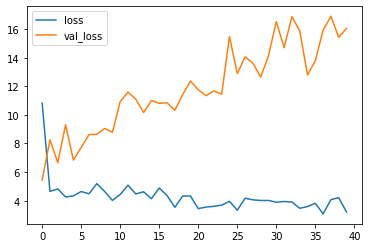

In [26]:
metrics[['loss','val_loss']].plot()

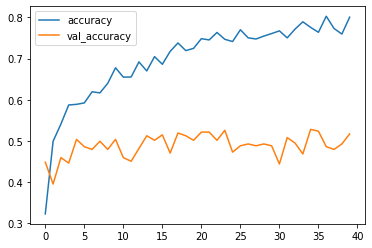

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
dct=training_set.class_indices
dct

{'black widow': 0,
 'captain america': 1,
 'doctor strange': 2,
 'hulk': 3,
 'ironman': 4,
 'loki': 5,
 'spider-man': 6,
 'thanos': 7}

In [29]:
lst=[]
for x in dct.keys():
  lst.append(x)
lst

['black widow',
 'captain america',
 'doctor strange',
 'hulk',
 'ironman',
 'loki',
 'spider-man',
 'thanos']

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Results

**Test Case-1**

Model Prediction=> black widow


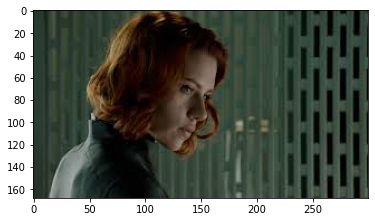

In [43]:
img_path='/content/drive/MyDrive/Test Cases/images.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model_saved.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

**Test Case-2**

Model Prediction=> ironman


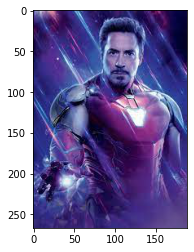

In [44]:
img_path='/content/drive/MyDrive/Test Cases/iron_mam.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model_saved.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

**Test-Case-3**

Model Prediction=> hulk


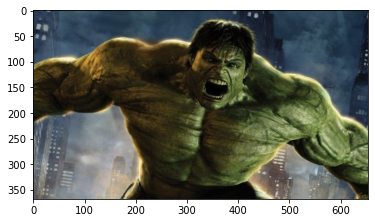

In [45]:
img_path='/content/drive/MyDrive/Test Cases/KwSeU4dvFnJkPJ9FWXNSk3.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model_saved.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

**Test Case-4**

Model Prediction=> doctor strange


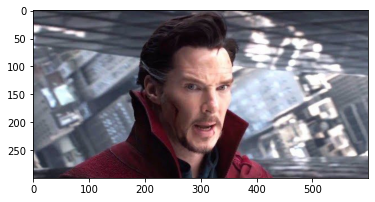

In [46]:
img_path='/content/drive/MyDrive/Test Cases/9c4719c85686690107d73bae04c0889d5cb44d55.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model_saved.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

**Test Case-5**

Model Prediction=> thanos


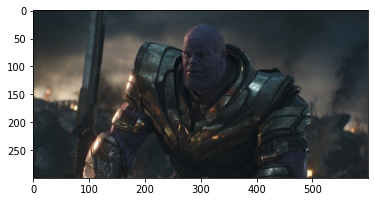

In [47]:
img_path='/content/drive/MyDrive/Test Cases/010fe43b47f41f3bc992014ab93f01996772f099.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model_saved.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

**Test-Case-6**

Model Prediction=> loki


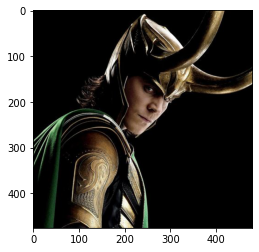

In [48]:
img_path='/content/drive/MyDrive/Test Cases/loki-1556801363.jpeg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model_saved.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

**Test Case-7**

Model Prediction=> captain america


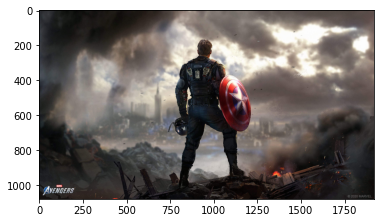

In [49]:
img_path='/content/drive/MyDrive/Test Cases/SQEX_Blog_Cap_Image2-2p6omydfp.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model_saved.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)